# Import Packages

In [1]:
from packages import *
%matplotlib inline

# Matplotlib setup

In [2]:
plt.style.use('seaborn')                  
plt.rcParams['ytick.right']     = False
plt.rcParams['ytick.labelright']= False
plt.rcParams['ytick.left']      = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams['figure.figsize']  = [7,7]

# Overall analysis of segmented audio samples

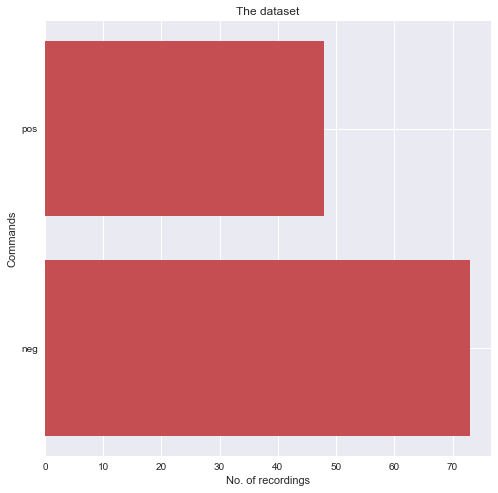

In [3]:
# number of Non-COVID-19 (neg) and COVID-19 (pos) segmented audio files

audioPth = "virufy/segmented/"
labels      = ["neg","pos"]

                                                                                                                   
numOfRecords= []
totalRecords= 0

for lbl in labels:
                                                                              
    pth     = os.path.join(audioPth,lbl)
    records = [f for f in os.listdir(pth) if f.endswith('.mp3')]
    
    numOfRecords.append(len(records))                                           
    totalRecords    = totalRecords+len(records)                                 

                                                                              
plt.figure(figsize=(8,8))
plt.barh(np.arange(len(labels)), 
         numOfRecords,
         color="C2")
plt.xlabel('No. of recordings')
plt.ylabel('Commands')
plt.yticks(np.arange(len(labels)), labels)
plt.title('The dataset')
plt.show()

In [4]:
# minimum and maximum duration of segmented audio files

durations   = []                                                               

for lbl in labels:
                                                                                
    pth     = os.path.join(audioPth,lbl)
    records = [f for f in os.listdir(pth) if f.endswith('.mp3')]
    
    for rcd in records:
                                                                               
        (smp,smpR)  = librosa.load(os.path.join(pth,rcd),sr=48000)        
        durations.append(float(len(smp)/smpR))
        
min(durations),max(durations)

(1.5998333333333334, 1.5999166666666667)

# Analysis of Non-COVID-19 segmented audio samples

In [5]:
def plot(wav,title):
    (smp,smpR)  = librosa.load(wav,sr=48000)                                                                                                         # Step 3
    plt.figure(figsize=(16,6))
    plt.plot(np.linspace(0,               # Start
                         len(smp)/smpR,   # Stop (convert sample number into second)
                         len(smp)),       # Number of points
             smp)
    plt.title(title)
    plt.xlabel('time in seconds')
    plt.ylabel('amplitude')
    plt.show()

In [6]:
neg_files = glob.glob('virufy/segmented/neg/*')
len(neg_files)

73

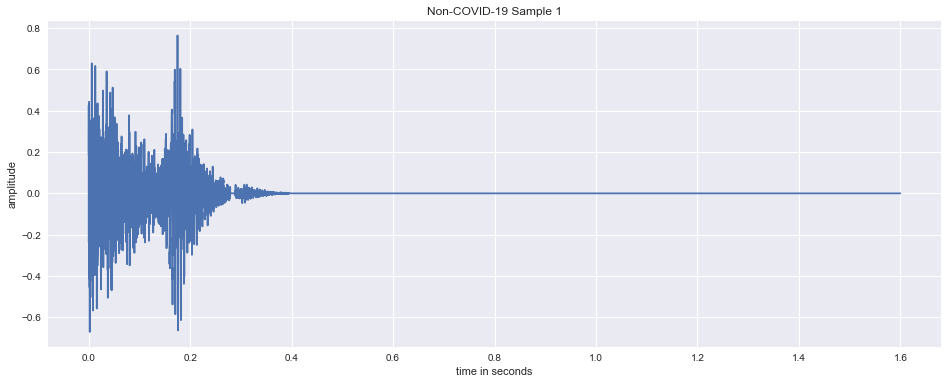

In [7]:
plot(neg_files[0],'Non-COVID-19 Sample 1')

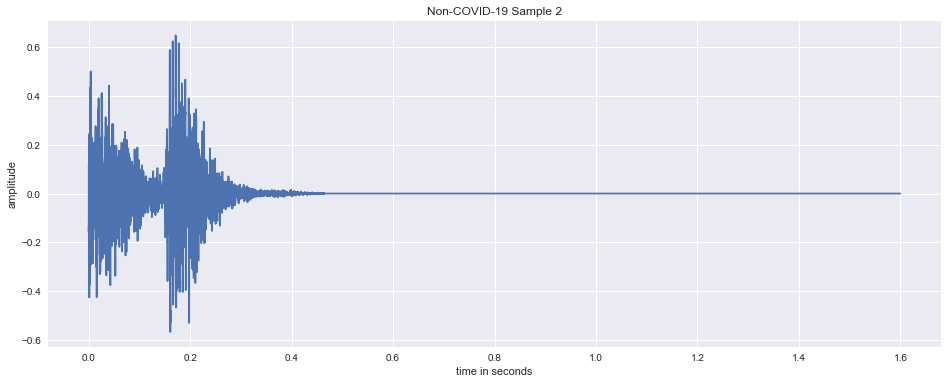

In [8]:
plot(neg_files[1],'Non-COVID-19 Sample 2')

# Analysis of COVID-19 segmented audio samples

In [9]:
pos_files = glob.glob('virufy/segmented/pos/*')
len(pos_files)

48

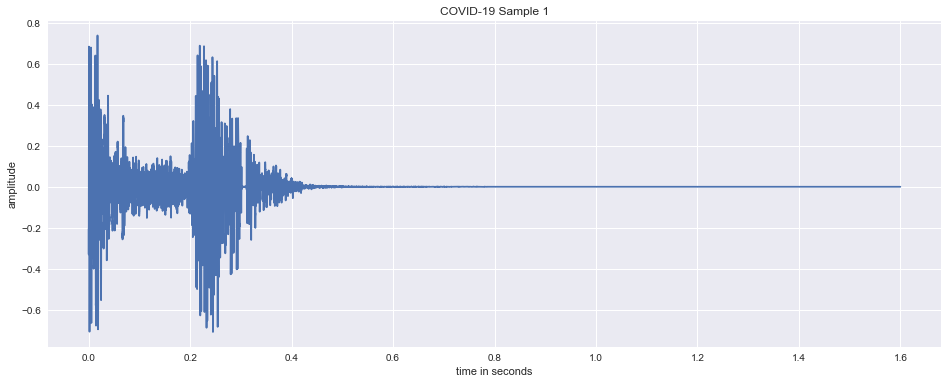

In [10]:
plot(pos_files[0],'COVID-19 Sample 1')

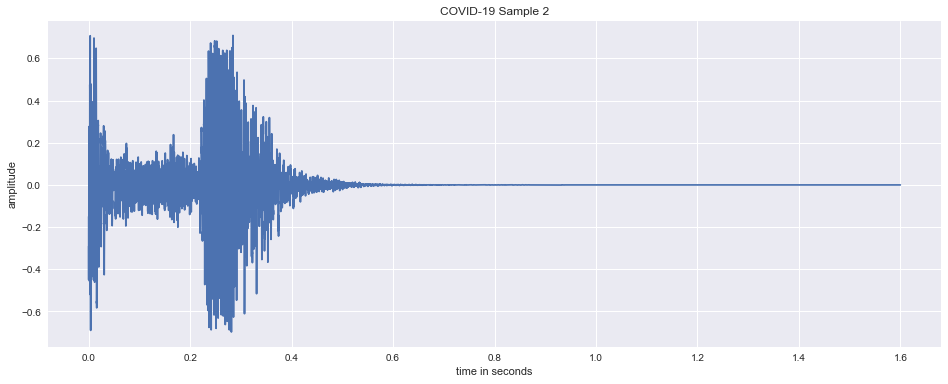

In [11]:
plot(pos_files[1],'COVID-19 Sample 2')

# Observations

* Both the intermediate and voiced phases are longer for COVID-19 subject than for Non-COVID-19 subject.
* Moreover, the signal amplitude during the voiced phase is higher for COVID-19 subject than for Non-COVID-19 subject.

The differences mentioned above indicate that the cough sound can be used as a valuable tool to discriminate the COVID-19 subject patient from the Non-COVID-19 subject.